# Classification Using Tensorflow  
Richard Kuo, 20180707
ver. 0.1.2 RMSPropOptimizer  
notebook - https://drive.google.com/drive/folders/1yIUd7g0OyY676zd1X_VGNqKoPPZIhdhQ  
pdf dir - /Users/rkuo/code/tensorflow/cnn-cifar10  

Code borrowed from:
- [Cifar-10 Classification using Keras Tutorial](https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/)
- [Object Recognition with Convolutional Neural Networks in the Keras Deep Learning Library](https://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/)
- [Convolutional Neural Networks (CNN) for CIFAR-10 Dataset](http://parneetk.github.io/blog/cnn-cifar10/)
- [Deep-math-machine-learning.ai](https://github.com/Madhu009/Deep-math-machine-learning.ai/blob/master/Neural_Networks/Convolutional_NN_Tensorflow.ipynb)
- [Keras code example](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)



## Import libraries

In [0]:
import time
import sys
import os

from __future__ import print_function

# sys.path.insert(0, 'drive/cifar10')
# os.chdir("drive/cifar10")

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.optimizers import SGD
from keras.utils import print_summary, to_categorical, np_utils

from keras.constraints import maxnorm

# Set backend, 
# For the difference of "tf" and "th"
# see https://stackoverflow.com/questions/39547279/loading-weights-in-th-format-when-keras-is-set-to-tf-format
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp 

## Load and display dataset

After data loading, to verify and better understand the dataset; sample some them. For more complicate dataset, plot, explore the contents.
- shapes
- sizes
- sample values

In [6]:
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 16s 0us/step


X_train shape: (50000, 3, 32, 32)
Y_train shape: (50000, 1)
50000  train samples
10000  test samples
Value of the first element of X_train:
[[[ 59  43  50 ... 158 152 148]
  [ 16   0  18 ... 123 119 122]
  [ 25  16  49 ... 118 120 109]
  ...
  [208 201 198 ... 160  56  53]
  [180 173 186 ... 184  97  83]
  [177 168 179 ... 216 151 123]]

 [[ 62  46  48 ... 132 125 124]
  [ 20   0   8 ...  88  83  87]
  [ 24   7  27 ...  84  84  73]
  ...
  [170 153 161 ... 133  31  34]
  [139 123 144 ... 148  62  53]
  [144 129 142 ... 184 118  92]]

 [[ 63  45  43 ... 108 102 103]
  [ 20   0   0 ...  55  50  57]
  [ 21   0   8 ...  50  50  42]
  ...
  [ 96  34  26 ...  70   7  20]
  [ 96  42  30 ...  94  34  34]
  [116  94  87 ... 140  84  72]]]
Value of the first element of Y_train:
[6]
X can be converted back to original images via utility function:


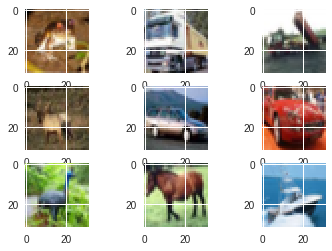

In [7]:
# Plot
import matplotlib.pyplot as plt
% matplotlib inline

from scipy.misc import toimage

import numpy as np
np.random.seed(2018) 

X_train  # get tensor type
Y_train
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print(X_train.shape[0], ' train samples')
print(X_test.shape[0],  ' test samples')

print("Value of the first element of X_train:")
print(X_train[0])
print("Value of the first element of Y_train:")
print(Y_train[0])

# create a grid of 3x3 images
print("X can be converted back to original images via utility function:")
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(toimage(X_train[i]))
# show the plot
plt.show()

There are three different sets/formats: python, Matlab and binary. Binary format has broke the dataset into smaller size so we can  do batch process. 

For python version:

**data** -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 (=1024) colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image, [ 59  43  50 ... 158 152 148]. 

The color of the first pixel of the image is R = 59, G= 62, B = 63.

Each image is represented by 3 X 32 X 32 (colors, width and height) tensor. The first diamension is for Red, the next sheet is for Blue, then the next sheet is for Green; like 3 sheets of paper, which are size 32 by 32 grids. Each grid records the values of the color, RBG, of image values (0–255). There are 50000 images for X_train.

Tensor is data structure, for example, 
```
1D  [1,2,3,4]        # one row
2D  [                # one sheet with two rows
            [1,2,3,4],
            [5,6,7,8]] 
3D [                 # three sheets, each sheet represents some type of measurement
          [                # for example, people's height, or intensity of color red 
            [1,2,3,4],
            [5,6,7,8]], 
          [                # for example, people's weight, or intensity of color blue, we only have two colors.
            [7,2,3,4],
            [6,6,7,8]]] 
```

**labels** -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.
For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

label_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

Y_train and Y_test are a vector (1D tensor). Y_train[0] = [6] means the label of the first element is a frog. 

X_train and X_test are 3D tensor, which can be converted back to image. 
![cifar10 classes](https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat6.png)

See [toronto data repo](https://www.cs.toronto.edu/~kriz/cifar.html) for more details. 

## Pre-process Data
The data may need to be pre-processed to fit ML library we want to use.

### Normalize
RBG value is range from 0-255. It would be easier to work from 0-1.


In [8]:
# print(X_train[0])
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train /= 255.0
X_test  /= 255.0

X_train[0]

array([[[0.23137255, 0.16862746, 0.19607843, ..., 0.61960787,
         0.59607846, 0.5803922 ],
        [0.0627451 , 0.        , 0.07058824, ..., 0.48235294,
         0.46666667, 0.47843137],
        [0.09803922, 0.0627451 , 0.19215687, ..., 0.4627451 ,
         0.47058824, 0.42745098],
        ...,
        [0.8156863 , 0.7882353 , 0.7764706 , ..., 0.627451  ,
         0.21960784, 0.20784314],
        [0.7058824 , 0.6784314 , 0.7294118 , ..., 0.72156864,
         0.38039216, 0.3254902 ],
        [0.69411767, 0.65882355, 0.7019608 , ..., 0.84705883,
         0.5921569 , 0.48235294]],

       [[0.24313726, 0.18039216, 0.1882353 , ..., 0.5176471 ,
         0.49019608, 0.4862745 ],
        [0.07843138, 0.        , 0.03137255, ..., 0.34509805,
         0.3254902 , 0.34117648],
        [0.09411765, 0.02745098, 0.10588235, ..., 0.32941177,
         0.32941177, 0.28627452],
        ...,
        [0.6666667 , 0.6       , 0.6313726 , ..., 0.52156866,
         0.12156863, 0.13333334],
        [0.5

The value of the first pixel R-channel is 59/255 = 0.2313, which is the current X_train value divided by 255. If we run this cell again, the value will be 0.00090734, which is = 0.2313/255.

The, we need to see what is train label Y_train looks like. 


In [9]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

It is a 50000 integer array.  

In [10]:
print(Y_train[0], Y_train[49999])

[6] [1]


We need to convert Y_train to one_hot array, from 50000 x 1 to 50000 x 10, for example, the first row from [6] to [0,0,0,0,0,1,0,0,0,0]. We can use a keras' utility `keras.utils.np_utils.to_categorical`, see discussion about to_categorical.

In [0]:
# create one hot vector

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [12]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Tensorflow
We will try to develop the solution with two different frameworks: Tensorflow and Keras, do Tensorflow first. The architecture looks like

[input (X)] -> [convolution (C1)] -> [pooling (P1)] -> [convolution (C2)] -> [pooling (P2)] -> [convolution (C3)] -> [pooling (P3)] -> [FC] -> [softmax] -> [output (Y predict)]

![convnet architecture](https://cdn-images-1.medium.com/max/2000/1*_CjMsDebNl_YL5p2mwKMvg.jpeg)

Figure from https://medium.com/deep-math-machine-learning-ai/chapter-8-1-code-for-convolutional-neural-networks-tensorflow-and-keras-theano-33bef285dd93

### Model

#### placeholder
Inserts a placeholder for a tensor that will be always fed, see [doc].(https://www.tensorflow.org/api_docs/python/tf/placeholder)

```
tf.placeholder(
    dtype,     
    shape=None,
    name=None
)
```
Args:
- dtype: The type of elements in the tensor to be fed.
- shape: The shape of the tensor to be fed (optional). If the shape is not specified, you can feed a tensor of any shape.
- name: A name for the operation (optional).

The difference is that with tf.Variable you have to provide an initial value when you declare it. With tf.placeholder you don't have to provide an initial value and you can specify it at run time with the feed_dict argument inside Session.run

In [0]:
import tensorflow as tf

X = tf.placeholder("float", [None,32,32,3])
Y = tf.placeholder("float", [None,10])

#### Weight

define a function to populate specific shape of tensor initially with random numbers.

tf.random_normal returns a tensor of specific shape with random number, see [doc](https://www.tensorflow.org/api_docs/python/tf/random_normal)

```    
tf.random_normal(
    shape,
    mean=0.0,
    stddev=1.0,
    dtype=tf.float32,
    seed=None,
    name=None
)
```
Args:
- shape: A 1-D integer Tensor or Python array. The shape of the output tensor.
- mean: A 0-D Tensor or Python value of type dtype. The mean of the normal distribution.
- stddev: A 0-D Tensor or Python value of type dtype. The standard deviation of the normal distribution.
- dtype: The type of the output.
- seed: A Python integer. Used to create a random seed for the distribution. See tf.set_random_seed for behavior.
- name: A name for the operation (optional).

#### Layer
tf's Layers (contrib) package 
- provide ops that take care of creating variables that are used internally in a consistent way,
- provide the building blocks for many common machine learning algorithms.

In [0]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

W_C1 = init_weights([3,3,3,32])     # 3x3x3  conv, 32 outputs
W_C2 = init_weights([3,3,32,64])    # 3x3x32 conv, 64 outputs
W_C3 = init_weights([3, 3, 64, 128])# 3x3x64 conv, 128 outputs

W_FC = init_weights([128 * 4 * 4, 625]) # FC 128 * 4 * 4 inputs, 625 outputs
W_O  = init_weights([625, 10])          # FC 625 inputs, 10 outputs (labels)

p_keep_conv = tf.placeholder("float")   # for dropouts as percentage
p_keep_hidden = tf.placeholder("float")

#### Convolution
tf's Neural Network (nn) API supports (partially excerpt here):

- Convolution ops sweep a 2-D filter over a batch of images, applying the filter to each window of each image of the appropriate size.
- Activation Function ops provide various types of nonlinearities for use in neural networks.
- Pooling ops sweep a rectangular window over the input tensor, computing a reduction operation for each window (average, max, or max with argmax).
... for details see [nn](https://www.tensorflow.org/api_guides/python/nn)

tf.nn.conv2d computes a 2-D convolution given 4-D input and filter tensors, see tf [conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d) for details.

```
tf.nn.conv2d(
    input,
    filter,
    strides,
    padding,
    use_cudnn_on_gpu=True,
    data_format='NHWC',
    dilations=[1, 1, 1, 1],
    name=None
)
```

#### Activation

ReLU is one of activation function supported in tf. 
tf.nn.relu takes a tensor (type options: float32, float64, int32, uint8, int16, int8, int64, bfloat16, uint16, half, uint32, uint64.) as input, rectifies it, and returns a tensor with the same type as input.

```
tf.nn.relu(
    features,
    name=None
)
```

#### Pooling

tf supports several different pooling ops:

- tf.nn.avg_pool
- tf.nn.max_pool
- tf.nn.max_pool_with_argmax
- tf.nn.avg_pool3d
- tf.nn.max_pool3d
- tf.nn.fractional_avg_pool
- tf.nn.fractional_max_pool
- tf.nn.pool

Max_pooling is a very popular pooling.

```
tf.nn.max_pool(
    value,
    ksize,
    strides,
    padding,
    data_format='NHWC',
    name=None
)
```
Args:
- value: A 4-D Tensor of the format specified by data_format.
- ksize: A 1-D int Tensor of 4 elements. The size of the window for each dimension of the input tensor.
- strides: A 1-D int Tensor of 4 elements. The stride of the sliding window for each dimension of the input tensor.
- padding: A string, either 'VALID' or 'SAME'. The padding algorithm. See the comment here
- data_format: A string. 'NHWC', 'NCHW' and 'NCHW_VECT_C' are supported.
- name: Optional name for the operation.

Returns:
A Tensor of format specified by data_format. The max pooled output tensor.

#### Dropout

tf.nn.dropout computes dropout. The dropout is used to prevent overfitting. Some % of neurons will be randomly dropped out (don’t get computed).

With probability keep_prob, outputs the input element scaled up by 1 / keep_prob, otherwise outputs 0. The scaling is so that the expected sum is unchanged, for details see [dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout).

```
tf.nn.dropout(
    x,
    keep_prob, 
    noise_shape=None,
    seed=None,
    name=None
)
```


In [0]:
def model(X, W_C1, W_C2, W_C3, W_FC, W_O, p_keep_conv,p_keep_hidden):
    
    C1 = tf.nn.relu(tf.nn.conv2d(X, W_C1, strides=[1,1,1,1], padding = "SAME")) 
    P1 = tf.nn.max_pool(C1,ksize=[1,2,2,1], strides=[1,2,2,1], padding = "SAME" ) # 1st pooling layer shape =(?,14,14,32)
    D1 = tf.nn.dropout(P1,p_keep_conv) # 1st dropout at conv
    
    C2 = tf.nn.relu(tf.nn.conv2d(D1,W_C2, strides=[1,1,1,1], padding = "SAME"))   # 2nd convoultion layer shape=(?, 14, 14, 62)
    P2 = tf.nn.max_pool(C2,ksize=[1,2,2,1], strides=[1,2,2,1], padding = "SAME" ) # 2nd pooling layer shape =(?,7,7,64)    
    D2 = tf.nn.dropout(P2,p_keep_conv) # 2nd dropout at conv
    
    
    C3 = tf.nn.relu(tf.nn.conv2d(D2,W_C3, strides=[1,1,1,1], padding = "SAME"))   # 3rd convoultion layer shape=(?, 7, 7, 128) 
    P3 = tf.nn.max_pool(C3,ksize=[1,2,2,1], strides=[1,2,2,1], padding = "SAME" ) # 3rd pooling layer shape =(?,4,4,128)
    
    P3 = tf.reshape(P3, [-1, W_FC.get_shape().as_list()[0]])    # reshape to (?, 2048)
    D3 = tf.nn.dropout(P3, p_keep_conv) # 3rd dropout at conv
    
    FC = tf.nn.relu(tf.matmul(D3,W_FC))
    FC = tf.nn.dropout(FC, p_keep_hidden) #droput at fc
    
    output = tf.matmul(FC,W_O)
    
    return output

#### Cost function, Optimizer and Predicted function.
todo - read [Neural Network Optimization Algorithms](https://towardsdatascience.com/neural-network-optimization-algorithms-1a44c282f61d)

In [0]:
Y_pred = model(X, W_C1, W_C2, W_C3, W_FC, W_O, p_keep_conv, p_keep_hidden)   # calling the above model
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = Y_pred ,labels = Y))

# optimizer = tf.train.AdamOptimizer(0.001, 0.9).minimize(cost)
optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)

predict_op = tf.argmax(Y_pred, 1)


### Session
To run TensorFlow model, we need to create a session and feed the real data.

In [0]:
# reshape input data per tf
X_train = X_train.reshape(-1,32,32,3) 
X_test = X_test.reshape(-1,32,32,3)

In [19]:
epochs = 50
import numpy as np
with tf.Session() as sess:
    # you need to initialize all variables
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        
        for start, end in zip(range(0, len(X_train), 128), range(128, len(X_train)+1, 128)): 
            sess.run(optimizer,feed_dict={X : X_train[start:end] , Y : Y_train[start:end],
                                          p_keep_conv: 0.8, p_keep_hidden: 0.5})
        if epoch % 10 == 0:
            accuracy= np.mean(np.argmax(Y_test, axis=1) == 
                              sess.run(predict_op, feed_dict={X: X_test, p_keep_conv: 1.0, p_keep_hidden: 1.0}))
                              
            print("epoch : {} and accuracy : {}" .format(epoch, accuracy))
            
            print("testing labels for test data")
            print(sess.run(predict_op, feed_dict={X: X_test,p_keep_conv: 1.0, p_keep_hidden: 1.0}))
            
    print("Final accuracy : {}" .format(np.mean(np.argmax(Y_test, axis=1) ==
                         sess.run(predict_op, feed_dict={X: X_test, p_keep_conv: 1.0, p_keep_hidden: 1.0}))))



epoch : 0 and accuracy : 0.2893
testing labels for test data
[5 8 9 ... 5 1 7]
epoch : 10 and accuracy : 0.589
testing labels for test data
[3 8 8 ... 5 2 7]
epoch : 20 and accuracy : 0.6267
testing labels for test data
[3 8 8 ... 5 1 7]
epoch : 30 and accuracy : 0.6471
testing labels for test data
[3 8 8 ... 5 1 7]
epoch : 40 and accuracy : 0.638
testing labels for test data
[3 8 8 ... 5 1 7]
Final accuracy : 0.6148
